In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns

In [2]:
df = pd.read_csv("spamTrain1.csv", header=None)
df_val = pd.read_csv("spamTrain2.csv", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0000,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0000,0.0102,0.0011,1
3,0.0000,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.0000,0.0000,-1.0,0.0121,0.0000,0.0,0.0000,0.0000,-1.0000,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,-1.0,0.0000,0.0000,0.0000,0.0000,...,-1.0,0.0,-1.0000,-1.0,-1.0,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,-1.0,0.0000,-1.0,0.0,0.0,0.0000,-1.0000,0.0000,0
1498,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,0.0000,0.0000,0.0000,-1.0000,...,0.0,-1.0,0.0000,0.0,0.0,-1.0,0.0000,0.0000,0.0188,0


In [4]:
df_val

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0000,0.0,-1.0000,0.0000,-1.0,-1.0000,0.0000,0.0,0.0000,...,-1.0,-1.0,0.0000,0.0,0.0,0.0,-1.0,-1.0000,0.0000,0
1,0.0,0.0000,0.0,-1.0000,0.0000,-1.0,0.0000,0.0000,0.0,0.0000,...,-1.0,0.0,-1.0000,0.0,0.0,-1.0,0.0,0.0000,0.0000,0
2,0.0,-1.0000,0.0,0.0000,0.0000,0.0,0.0000,-1.0000,0.0,-1.0000,...,0.0,0.0,0.0101,-1.0,0.0,0.0,0.0,0.0000,0.0000,0
3,0.0,0.0024,-1.0,0.0036,0.0000,0.0,0.0072,0.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,-1.0,0.0,0.0000,0.0036,0
4,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,-1.0,0.0,-1.0,-1.0,0.0000,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0037,0.0,-1.0000,-1.0000,0.0,0.0000,0.0000,-1.0,0.0000,...,0.0,0.0,0.0000,0.0,-1.0,0.0,-1.0,0.0000,0.0000,0
1496,0.0,-1.0000,0.0,0.0000,0.0000,-1.0,-1.0000,0.0043,0.0,0.0043,...,0.0,0.0,0.0124,-1.0,0.0,-1.0,0.0,0.0043,0.0087,1
1497,0.0,0.0000,-1.0,0.0000,0.0000,-1.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0129,-1.0,0.0,0.0,0.0,0.0000,-1.0000,0
1498,0.0,0.0000,0.0,0.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,-1.0,0.0,0.0,0.0,0.0000,0.0000,0


<h1>Data Desc</h1>

<p>-1 Implies that the data is missing </p>
<p>Each feature corresponds to a word and denotes the proportion of all words in the email that match the given word</p>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
 8   8       1500 non-null   float64
 9   9       1500 non-null   float64
 10  10      1500 non-null   float64
 11  11      1500 non-null   float64
 12  12      1500 non-null   float64
 13  13      1500 non-null   float64
 14  14      1500 non-null   float64
 15  15      1500 non-null   float64
 16  16      1500 non-null   float64
 17  17      1500 non-null   float64
 18  18      1500 non-null   float64
 19  19      1500 non-null   float64
 20  20      1500 non-null   float64
 21  21      1500 non-null   float64
 22  

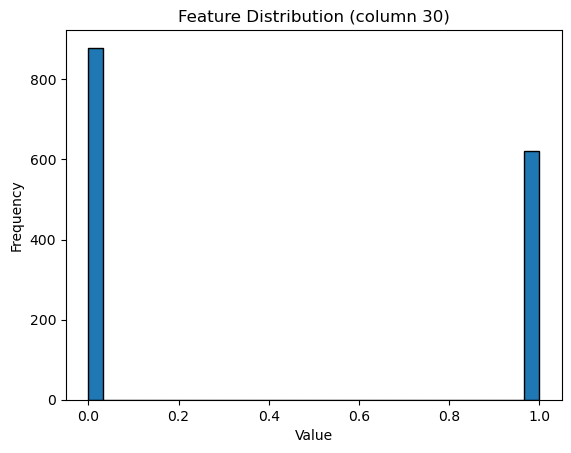

30
0    879
1    621
Name: count, dtype: int64
Percent of Data Labeled 0: 0.586 
Percent of Data Labeled 1: 0.414 


In [6]:
plt.hist(df[30], bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df[30].value_counts())
print(f"Percent of Data Labeled 0: {df[30].value_counts()[0] / (df[30].value_counts()[0]+ df[30].value_counts()[1])} ")
print(f"Percent of Data Labeled 1: {df[30].value_counts()[1] / (df[30].value_counts()[0]+ df[30].value_counts()[1])} ")

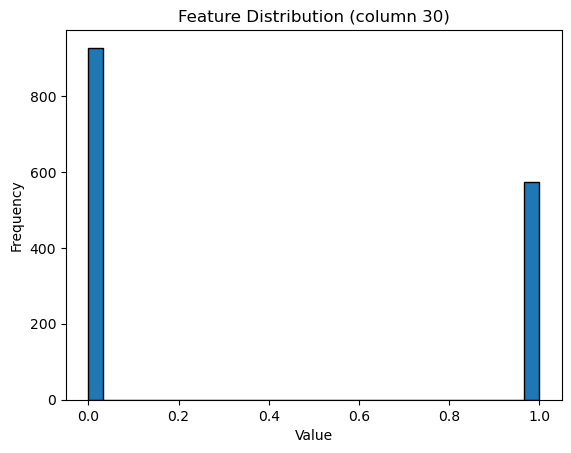

30
0    927
1    573
Name: count, dtype: int64
Percent of Data Labeled 0: 0.618 
Percent of Data Labeled 1: 0.382 


In [7]:
plt.hist(df_val[30], bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df_val[30].value_counts())
print(f"Percent of Data Labeled 0: {df_val[30].value_counts()[0] / (df_val[30].value_counts()[0]+ df_val[30].value_counts()[1])} ")
print(f"Percent of Data Labeled 1: {df_val[30].value_counts()[1] / (df_val[30].value_counts()[0]+ df_val[30].value_counts()[1])} ")


In [8]:
# Replace all the -1 with nan
#df = df.replace(-1, np.nan)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0000,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0000,0.0102,0.0011,1
3,0.0000,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.0000,0.0000,-1.0,0.0121,0.0000,0.0,0.0000,0.0000,-1.0000,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,-1.0,0.0000,0.0000,0.0000,0.0000,...,-1.0,0.0,-1.0000,-1.0,-1.0,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,-1.0,0.0000,-1.0,0.0,0.0,0.0000,-1.0000,0.0000,0
1498,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,0.0000,0.0000,0.0000,-1.0000,...,0.0,-1.0,0.0000,0.0,0.0,-1.0,0.0000,0.0000,0.0188,0


In [10]:
plt.figure(figsize=(20, 16))
#sns.heatmap(df.replace(-1, np.nan).corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
#plt.title('Correlation Matrix Heatmap')
#plt.show()


<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

<h2>pandas.DataFrame.corr</h2>
<p> Compute pairwise correlation of columns, excluding NA/null values.</p>
<p>Clearly some columns are very similar in terms of linear relationship. We might interpet this as "words commonly used together" because the data represents the proportion of words found in a given email  </p>

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.187144,-0.180507,-0.200927,-0.206216,-0.202737,-0.191914,-0.191667,-0.192834,-0.199013,-0.201571,...,-0.210827,-0.206124,-0.197161,-0.197932,-0.201239,-0.204559,-0.198309,-0.197247,-0.206794,0.414000
std,0.391280,0.385825,0.401341,0.407791,0.403768,0.394929,0.395027,0.397012,0.400643,0.403680,...,0.408663,0.405359,0.399911,0.400489,0.401182,0.404496,0.399313,0.399009,0.408306,0.492713
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003200,1.000000
max,0.058800,0.046800,0.035700,0.062500,0.071400,0.100000,0.045400,0.075500,0.054000,0.142800,...,0.047600,0.166600,0.090900,0.171000,0.074000,0.058800,0.023800,0.052600,0.043400,1.000000


In [12]:
df_val.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.191303,-0.204532,-0.201580,-0.192792,-0.200308,-0.188527,-0.202763,-0.204152,-0.20845,-0.210443,...,-0.204775,-0.196790,-0.219296,-0.196660,-0.196530,-0.221892,-0.220262,-0.191329,-0.207807,0.382000
std,0.394363,0.404509,0.401845,0.397893,0.401663,0.392322,0.403754,0.405536,0.40744,0.409803,...,0.404377,0.398411,0.415589,0.398526,0.397686,0.416610,0.415056,0.394339,0.408600,0.486039
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002300,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,1.000000
max,0.047600,0.111100,0.035700,0.100000,0.048700,0.061500,0.068900,0.047600,0.07270,0.142800,...,0.047600,0.100000,0.076900,0.154300,0.083300,0.047600,0.023100,0.033300,0.051000,1.000000


In [13]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [14]:
features_val = df_val.iloc[:,:-1]
target_val =  df_val.iloc[:,-1]

In [15]:
features['__source__'] = 'A'
features_val['__source__'] = 'B'

In [16]:
features_combined = pd.concat([features,features_val]).reset_index(drop=True)
target_combined = pd.concat([target, target_val]).reset_index(drop=True)

In [17]:
features_combined

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,__source__
0,0.00,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0029,A
1,0.00,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0031,0.0094,A
2,0.00,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0,0.0102,0.0011,A
3,0.00,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0,0.0000,0.0133,A
4,0.01,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0,0.0000,0.0000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.00,0.0037,0.0,-1.0000,-1.0000,0.0,0.0000,0.0000,-1.0,0.0000,...,0.0,0.0,0.0000,0.0,-1.0,0.0,-1.0,0.0000,0.0000,B
2996,0.00,-1.0000,0.0,0.0000,0.0000,-1.0,-1.0000,0.0043,0.0,0.0043,...,0.0,0.0,0.0124,-1.0,0.0,-1.0,0.0,0.0043,0.0087,B
2997,0.00,0.0000,-1.0,0.0000,0.0000,-1.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0129,-1.0,0.0,0.0,0.0,0.0000,-1.0000,B
2998,0.00,0.0000,0.0,0.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,-1.0,0.0,0.0,0.0,0.0000,0.0000,B


In [18]:
pd.DataFrame(features_combined).dropna()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,__source__
0,0.00,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0029,A
1,0.00,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0031,0.0094,A
2,0.00,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0,0.0102,0.0011,A
3,0.00,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0,0.0000,0.0133,A
4,0.01,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0,0.0000,0.0000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.00,0.0037,0.0,-1.0000,-1.0000,0.0,0.0000,0.0000,-1.0,0.0000,...,0.0,0.0,0.0000,0.0,-1.0,0.0,-1.0,0.0000,0.0000,B
2996,0.00,-1.0000,0.0,0.0000,0.0000,-1.0,-1.0000,0.0043,0.0,0.0043,...,0.0,0.0,0.0124,-1.0,0.0,-1.0,0.0,0.0043,0.0087,B
2997,0.00,0.0000,-1.0,0.0000,0.0000,-1.0,0.0000,-1.0000,0.0,0.0000,...,0.0,0.0,0.0129,-1.0,0.0,0.0,0.0,0.0000,-1.0000,B
2998,0.00,0.0000,0.0,0.0000,0.0000,0.0,-1.0000,0.0000,0.0,0.0000,...,0.0,0.0,-1.0000,-1.0,0.0,0.0,0.0,0.0000,0.0000,B


<h2>Dealing with NaNs</h2>
<p>We will have to use some imputation methods to deal with the missing values</p>
<p>Cannot drop misisng values, (99.8% data decrease), Impute mean or median or use regression technques </p>
<p>Split data into train and valudation. I don't believe that we need to scale the features due to them already being scaled by proportion </p>

In [19]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

<h1>Splitting Validation Data</h1>
<h3>Note that we now have two datasets, each with 1500 rows. Now their distributions are very similar but their target distribution is a bit different </h3>
<p>For the training dataset we have: Percent of Data Labeled 0: 0.586. Percent of Data Labeled 1: 0.414 </p>
<p>For the Validation dataset we have: Percent of Data Labeled 0: 0.618. Percent of Data Labeled 1: 0.382</p>

<p>I will train the model on the training data, and then split the validation data into val and test. It will be a 50/50 split, in which I will maintain the target distribution of the validation data</p>

In [20]:
stratum = target_combined.astype(str) + '_' + features_combined['__source__']

In [21]:
stratum

0       1_A
1       1_A
2       1_A
3       1_A
4       0_A
       ... 
2995    0_B
2996    1_B
2997    0_B
2998    0_B
2999    1_B
Length: 3000, dtype: object

In [22]:
# Stratified shuffle split into train/val/test (example 60/20/20)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, temp_idx = next(sss.split(features_combined, stratum))

In [23]:
X_train = features_combined.iloc[train_idx]
y_train = target_combined.iloc[train_idx]

X_test = features_combined.iloc[temp_idx]
y_test = target_combined.iloc[temp_idx]

In [24]:
features_combined["__source__"].value_counts(), X_train["__source__"].value_counts(), X_test["__source__"].value_counts(), 

(__source__
 A    1500
 B    1500
 Name: count, dtype: int64,
 __source__
 A    1200
 B    1200
 Name: count, dtype: int64,
 __source__
 B    300
 A    300
 Name: count, dtype: int64)

In [25]:
X_train = X_train.drop(columns='__source__')
X_test = X_test.drop(columns='__source__')

In [26]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,-0.192190,-0.202691,-0.199431,-0.205325,-0.182254,-0.222612,-0.182210,-0.181236,-0.229249,-0.228389,...,-0.189070,-0.190993,-0.181239,-0.230296,-0.196072,-0.193016,-0.217480,-0.203018,-0.212629,-0.229366
std,0.395834,0.403147,0.400631,0.408082,0.387790,0.417233,0.387811,0.388294,0.421605,0.422229,...,0.393113,0.394287,0.386104,0.423035,0.398156,0.395424,0.413934,0.402977,0.410379,0.423540
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002875
max,0.047600,0.040000,0.035700,0.100000,0.033300,0.045400,0.033300,0.050000,0.031200,0.142800,...,0.052600,0.047600,0.041600,0.090900,0.103800,0.083300,0.047600,0.016100,0.033300,0.051000


In [27]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2400, 30), (2400,), (600, 30), (600,))

In [28]:
print(f"Percent of Validation Data Labeled 0: {y_train.value_counts()[0] / (y_train.value_counts()[0]+ y_train.value_counts()[1])} ")
print(f"Percent of Validation Data Labeled 1: {y_train.value_counts()[1] / (y_train.value_counts()[0]+ y_train.value_counts()[1])} ")

print("*************************")

print(f"Percent of Test Data Labeled 0: {y_test.value_counts()[0] / (y_test.value_counts()[0]+ y_test.value_counts()[1])} ")
print(f"Percent of Test Data Labeled 1: {y_test.value_counts()[1] / (y_test.value_counts()[0]+ y_test.value_counts()[1])} ")


Percent of Validation Data Labeled 0: 0.6020833333333333 
Percent of Validation Data Labeled 1: 0.39791666666666664 
*************************
Percent of Test Data Labeled 0: 0.6016666666666667 
Percent of Test Data Labeled 1: 0.3983333333333333 


In [29]:
train_means = X_train.mean()
test_means = X_test.mean()
drift = (train_means - test_means).abs().sort_values(ascending=False)
print(drift.head(10))


10    0.060570
5     0.040490
8     0.031897
12    0.029602
9     0.027978
23    0.027584
29    0.027581
17    0.025434
22    0.025272
4     0.024086
dtype: float64


In [30]:
train_corr = X_train.corr().abs().values
test_corr = X_test.corr().abs().values
np.mean(np.abs(train_corr - test_corr))

np.float64(0.02352537025696691)

<h1>Imputing Data</h1>
<h3>Various strategies can be utilized here: Mean imputation, Median imputation, KNN imputation, etc.</h3>
<p>It is worth noting that the models appear to insignificantly (+ .2% -.5% improved AUC ) perform better with mean imputation</p>
<p>It is also worth noting that despite the AUC dropping when we swap to KNN Imputation, the TPR at 1% FPR significantly (+ 0.05 - .1) rises</p>
<p>Finally, as we plan to utilize cross validation, we will be fusing our training and validation dataset as cross validation will arbitrarily split them for us</p>

In [31]:
mean_imputer = SimpleImputer(strategy='mean', missing_values=-1)
X_train_mean_imputation = pd.DataFrame(mean_imputer.fit_transform(X_train),
                                       columns=X_train.columns)
X_test_mean_imputation = pd.DataFrame(mean_imputer.transform(X_test),
                                     columns=X_test.columns)

median_imputer = SimpleImputer(strategy='median', missing_values=-1)
X_train_median_imputation = pd.DataFrame(median_imputer.fit_transform(X_train),
                                         columns=X_train.columns)
X_test_median_imputation = pd.DataFrame(median_imputer.transform(X_test),
                                       columns=X_test.columns)



In [32]:
# determine perceentage null for each feature; What percentage of column is null. If nulls are prevalent in a feature, filter data to get subset that has no nulls; 
# Train model to predict the feature with the highest number of nulls. 
# Table for percentage nulls 
# Some features will be more null dominant? 
# Drop na with null value 
# Ramdom Forest Classifier 
# Train first with random mforest 
# Confusion matrix 

# Train specalist models (2 models to test incoming data for 0 or 1 and then final model to decide value (can take mean) )
# Use confidence levels or probabilties 

In [33]:
X_train_mean_imputation.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,0.000845,0.001058,0.000469,0.002962,0.001464,0.000972,0.001401,0.002233,0.001224,0.002095,...,0.001525,0.000631,0.000721,0.001828,0.001433,0.000081,0.000958,0.000504,0.000882,0.002993
std,0.003883,0.003965,0.002031,0.005425,0.004308,0.005293,0.003937,0.004965,0.003738,0.011078,...,0.007663,0.002907,0.005063,0.004656,0.010247,0.000925,0.004117,0.002298,0.002578,0.004808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000
75%,0.000845,0.001058,0.000469,0.002962,0.001464,0.000000,0.001401,0.002233,0.001224,0.002095,...,0.001525,0.000631,0.000721,0.001828,0.000000,0.000000,0.000958,0.000504,0.000882,0.003200
max,0.058800,0.111100,0.034400,0.062500,0.071400,0.100000,0.068900,0.075500,0.072700,0.142800,...,0.142800,0.047600,0.166600,0.076900,0.171000,0.034400,0.058800,0.023800,0.052600,0.045400


In [34]:
X_train_median_imputation.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,0.000685,0.000856,0.000374,0.002368,0.001160,0.000794,0.001118,0.001776,0.000981,0.001672,...,0.001211,0.000497,0.000572,0.001455,0.001148,0.000065,0.000754,0.000398,0.000714,0.002382
std,0.003897,0.003987,0.002040,0.005553,0.004349,0.005306,0.003977,0.005046,0.003770,0.011110,...,0.007688,0.002918,0.005071,0.004714,0.010263,0.000926,0.004136,0.002307,0.002601,0.004957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003200
max,0.058800,0.111100,0.034400,0.062500,0.071400,0.100000,0.068900,0.075500,0.072700,0.142800,...,0.142800,0.047600,0.166600,0.076900,0.171000,0.034400,0.058800,0.023800,0.052600,0.045400


In [35]:
#pip install lightgbm
#!pip install catboost

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [37]:
models = {
    "GaussianNB": GaussianNB(),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "SVM": SVC(
        C=10,
        gamma=0.01,
        kernel='rbf',
        probability=True,
        random_state=42,
    ),
    "CatBoost": CatBoostClassifier(iterations=5, learning_rate=0.1),
    "XGBoost": xgb.XGBClassifier( 
        eval_metric='logloss', 
        random_state=42,
        max_depth=2,
        min_child_weight=10,# limit tree depth
        n_estimators=50, # smaller number of trees
        learning_rate=0.05,
        subsample=0.8,    # row sampling
        colsample_bytree=0.8, # column sampling
        reg_alpha=2,    # L1 regularization
        reg_lambda=3,      # L2 regularization
    )
}

In [38]:

def tpr_at_fpr(y_true, y_score, fpr_target=0.01):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    # Interpolate TPR at the target FPR
    return np.interp(fpr_target, fpr, tpr)


<h2>Model Training & Testing</h2>
<h4>At this point, we will need to decide which data to use. While we could perform our operations on all of them, it eaiser to just hold them in one variable and change the variable for each different type of training and validation dataset, keeping track of which performs the best</h4>
<h4>Note that our y_train and y_val remain untouched as those are just the target values. There is no need to perform anything on them unless values are missing which is not the case for this dataset</h4>

In [39]:
X_train_cur = X_train_median_imputation
X_test_cur = X_test_median_imputation

In [40]:
X_train_cur.shape,X_test_cur.shape, y_train.shape, y_test.shape

((2400, 30), (600, 30), (2400,), (600,))

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    aucs = []
    tprs = []
    for train_idx, val_idx in cv.split(X_train_cur, y_train):
        X_train_stratified, X_val_stratified = X_train_cur.iloc[train_idx], X_train_cur.iloc[val_idx]
        y_train_stratified, y_val_stratified = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Consider scaling??? Insignificant changes in result 
        #scaler = StandardScaler()
        #X_tr_scaled = scaler.fit_transform(X_train_stratified)
        #X_val_scaled = scaler.transform(X_val_stratified)

        
        model.fit(X_train_stratified, y_train_stratified)
        
        # Some models output probabilities, some don't
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_val_stratified)[:, 1]
        else:
            y_scores = model.decision_function(X_val_stratified)
        
        aucs.append(roc_auc_score(y_val_stratified, y_scores))
        tprs.append(tpr_at_fpr(y_val_stratified, y_scores, fpr_target=0.01))
    
    results[name] = {
        "Mean AUC": np.mean(aucs),
        "Mean TPR@1%FPR": np.mean(tprs)
    }
results


C:\Users\ekkoi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ekkoi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Number of positive: 764, number of negative: 1156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397917 -> initscore=-0.414153
[LightGBM] [Info] Start training from score -0.414153
[LightGBM] [Info] Number of positive: 764, number of negative: 1156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2019
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397917 -> initscore=-0.414153
[LightGBM] [Info] Start training from score -0.414153
[LightGBM] [Info] Nu

{'GaussianNB': {'Mean AUC': np.float64(0.8203337016974945),
  'Mean TPR@1%FPR': np.float64(0.1091105293775451)},
 'LightGBM': {'Mean AUC': np.float64(0.900213771988623),
  'Mean TPR@1%FPR': np.float64(0.3769633507853403)},
 'SVM': {'Mean AUC': np.float64(0.8501657638725341),
  'Mean TPR@1%FPR': np.float64(0.14136125654450263)},
 'CatBoost': {'Mean AUC': np.float64(0.8801155818040183),
  'Mean TPR@1%FPR': np.float64(0.3424188481675393)},
 'XGBoost': {'Mean AUC': np.float64(0.8819181506911355),
  'Mean TPR@1%FPR': np.float64(0.38510994764397904)}}

In [42]:
df_results = pd.DataFrame(results).T.sort_values(by="Mean AUC", ascending=False)
print(df_results)


            Mean AUC  Mean TPR@1%FPR
LightGBM    0.900214        0.376963
XGBoost     0.881918        0.385110
CatBoost    0.880116        0.342419
SVM         0.850166        0.141361
GaussianNB  0.820334        0.109111


<h1>Conversations about Metholody, Results, and Future Plans </h1>
<p>We trained 5 models, GaussianNB, SVM, XGBoost, CatBoost, and LightGBM</p>
<p>To train the models, we took the two datasets and combined them, keeping track of which row in the combinded dataset corresponded to which dataset for splitting purposes</p>
<p>Next, using StratifiedShuffleSplit, we split the combined data into 80/20, where 80% of the data is for training and 20% is for testing. We preserved the distribution of the two dataset rows in the splits</p>
<p>Worth noting that we also preserved the distribution of the target in the process</p>
<p>Next, we perform our imputation methods and choose one to pursue. As of right now, KNN imputation is the worst while mean and median are both consierable. Median seems slightly better though so we will go with Median imputation</p>
<p>A bit of information from the future: Our 3 best performing models are tree-based, meaning that we do not need to impute the data as they will optimally split on missing values. The results also prove this. Something worth considering</p>
<p>We then perform StratifiedKSplit on the 80% training data, using n_splits=5, hence we split the training data with a 80/20 split, where 80% of the training data remains for training and 20% goes to validation. Below were our results</p>

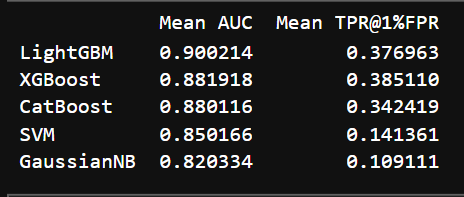 

<h3>Test Results</h3>
<p>Next, we see how well these models fare on the held out test data. We are on the lookout for overfitting, undefitting, and other odd behavior in our results. Below were our results for the testing data</p>

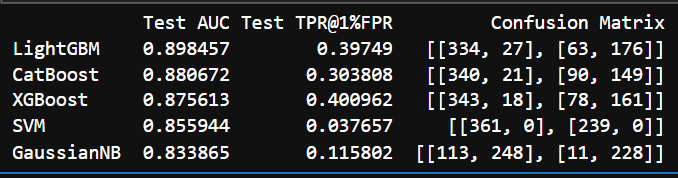

<p>For SVM: It simpyly predicts 0 for all the classes, which results in it have a TPR of 1 and an FPR of 1. Despite this, its AUC is still pretty good. According to ChatGPT:</p>
<p style="text-indent: 20px;">The SVM’s margin distances still vary across emails.</p>
<p style="text-indent: 20px;">Even though the decision boundary threshold (0) puts everything on one side, the ranking of samples may still separate spam and non-spam fairly well</p>
<p>For NaiveBayes: Its confusion matrix appears to be a bit better but on further calculations, it has a TPR of 0.313 and a FPR of 0.046, quite terrible </p>
<p>For the XGBoost, LightGBM, and CatBoost: These three models performed robustly on both the training and testing data, showing that tree based models are worth explroing (not all though, decision tree performs terribly)</p>
<p>According to ChatGPT, these are the reasons for their robustness</p>
<p style="text-indent: 20px;">LightGBM/XGBoost split on thresholds, so feature scaling or small drift barely affects performance.</p>
<p style="text-indent: 20px;">They automatically learn non-linear AND feature-crossing relationships.</p>
<p style="text-indent: 20px;">Gradient boosting trees handle -1 or imputed values gracefully.</p>
<p style="text-indent: 20px;">Their sigmoid calibration is often good enough for AUC/TPR@1%FPR metrics.</p>

<h3>Next Plans</h3>
<p>The competitvie baseline has an AUC of 0.884 and a TPR at 1% FPR of 0.319</p>
<p>As of current, we only have 1 model that beats both the AUC and TPR of the competitive baseline but we do note that XGBoost has a really high TPR at 1% FPR</p>
<p>We next look to optimze each of these three models hyperparameters with GridSearchCV or some other hyperparameter searching tool</p>
<p>We will also consider the different imputation methods that we can utilize, especilaly Iterative Imputer (MICE) with BayesianRidge</p>
<p>We will then consider Ensembling a permutation of the 3 models, to see if we can reach even higher results</p>
<h4>NOTE: During these steps, we will evaluate our model performance simply on its increasing val AUC and TPR at 1% FPR. We will not use the test data to tweak parameters. When we are finally done, we will verify that our test has not significantly decreased and hopefully increased</h4>

In [43]:
113/(113+248),11/(11+228)

(0.31301939058171746, 0.04602510460251046)

In [44]:
"""
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

svm = SVC(probability=True, random_state=42)

grid = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=5)
grid.fit(X_scaled, y_train)

tprs.append(tpr_at_fpr(y_val, y_scores_val, fpr_target=0.01))


print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)
# After running the loop
print("SVM TPR@1%FPR per fold:", tprs)  # when model name == "SVM"
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'C\': [0.1, 1, 10],\n    \'gamma\': [\'scale\', 0.01, 0.1, 1],\n    \'kernel\': [\'rbf\']\n}\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X_train)\n\nsvm = SVC(probability=True, random_state=42)\n\ngrid = GridSearchCV(svm, param_grid, scoring=\'roc_auc\', cv=5)\ngrid.fit(X_scaled, y_train)\n\ntprs.append(tpr_at_fpr(y_val, y_scores_val, fpr_target=0.01))\n\n\nprint("Best params:", grid.best_params_)\nprint("Best CV AUC:", grid.best_score_)\n# After running the loop\nprint("SVM TPR@1%FPR per fold:", tprs)  # when model name == "SVM"\n'

<h1>Testing</h1>

In [45]:
for name, model in models.items():
    
    model.fit(X_train_cur, y_train)
    
    # Some models output probabilities, some don't
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_cur)[:, 1]
        y_scores_discrete = model.predict(X_test_cur)
    else:
        y_scores = model.decision_function(X_test_cur)
    
    
    results[name] = {
        "Test AUC":roc_auc_score(y_test, y_scores),
        "Test TPR@1%FPR": tpr_at_fpr(y_test, y_scores, fpr_target=0.01),
        "Confusion Matrix": confusion_matrix(y_test, y_scores_discrete)
    }
results

[LightGBM] [Info] Number of positive: 955, number of negative: 1445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2237
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397917 -> initscore=-0.414153
[LightGBM] [Info] Start training from score -0.414153
0:	learn: 0.6321309	total: 12.2ms	remaining: 48.8ms
1:	learn: 0.5872201	total: 22.3ms	remaining: 33.4ms
2:	learn: 0.5518065	total: 32.4ms	remaining: 21.6ms
3:	learn: 0.5221667	total: 42.7ms	remaining: 10.7ms
4:	learn: 0.4999705	total: 52.8ms	remaining: 0us


{'GaussianNB': {'Test AUC': np.float64(0.8338645556856246),
  'Test TPR@1%FPR': np.float64(0.11580195258019524),
  'Confusion Matrix': array([[113, 248],
         [ 11, 228]])},
 'LightGBM': {'Test AUC': np.float64(0.8984573302889463),
  'Test TPR@1%FPR': np.float64(0.39748953974895396),
  'Confusion Matrix': array([[334,  27],
         [ 63, 176]])},
 'SVM': {'Test AUC': np.float64(0.855944088364492),
  'Test TPR@1%FPR': np.float64(0.03765690376569038),
  'Confusion Matrix': array([[361,   0],
         [239,   0]])},
 'CatBoost': {'Test AUC': np.float64(0.8806720059342366),
  'Test TPR@1%FPR': np.float64(0.30380753138075317),
  'Confusion Matrix': array([[340,  21],
         [ 90, 149]])},
 'XGBoost': {'Test AUC': np.float64(0.8756128374227796),
  'Test TPR@1%FPR': np.float64(0.4009623430962343),
  'Confusion Matrix': array([[343,  18],
         [ 78, 161]])}}

In [46]:
df_results = pd.DataFrame(results).T.sort_values(by="Test AUC", ascending=False)
print(df_results)

            Test AUC Test TPR@1%FPR         Confusion Matrix
LightGBM    0.898457        0.39749   [[334, 27], [63, 176]]
CatBoost    0.880672       0.303808   [[340, 21], [90, 149]]
XGBoost     0.875613       0.400962   [[343, 18], [78, 161]]
SVM         0.855944       0.037657     [[361, 0], [239, 0]]
GaussianNB  0.833865       0.115802  [[113, 248], [11, 228]]


In [47]:
y_test.value_counts()

30
0    361
1    239
Name: count, dtype: int64

[LightGBM] [Info] Number of positive: 764, number of negative: 1156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397917 -> initscore=-0.414153
[LightGBM] [Info] Start training from score -0.414153
[LightGBM] [Info] Number of positive: 764, number of negative: 1156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2019
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 30
[LightGBM] [Info] [binary:

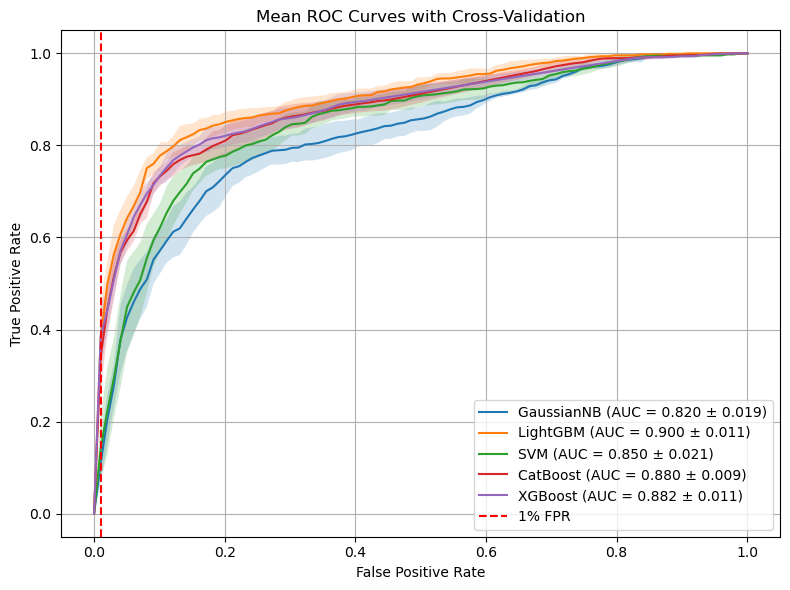

In [48]:
def plot_mean_roc(model, X, y, n_splits=5, label=None):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_idx, val_idx in cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X.iloc[val_idx])[:, 1]
        else:
            y_score = model.decision_function(X.iloc[val_idx])
            
        fpr, tpr, _ = roc_curve(y.iloc[val_idx], y_score)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        fold_auc = auc(fpr, tpr)
        aucs.append(fold_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, label=f"{label} (AUC = {mean_auc:.3f} ± {std_auc:.3f})")
    plt.fill_between(mean_fpr,
                     np.maximum(mean_tpr - np.std(tprs, axis=0), 0),
                     np.minimum(mean_tpr + np.std(tprs, axis=0), 1),
                     alpha=0.2)

plt.figure(figsize=(8, 6))

for name, model in models.items():
    plot_mean_roc(model, X_train_cur, y_train, label=name)

plt.axvline(x=0.01, color='red', linestyle='--', label='1% FPR')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Mean ROC Curves with Cross-Validation")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


[LightGBM] [Info] Number of positive: 621, number of negative: 879
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1724
[LightGBM] [Info] Number of data points in the train set: 1500, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.414000 -> initscore=-0.347454
[LightGBM] [Info] Start training from score -0.347454


C:\Users\ekkoi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test set AUC: 0.8832899386449939
TPR at FPR = 0.01: 0.3106457242582897


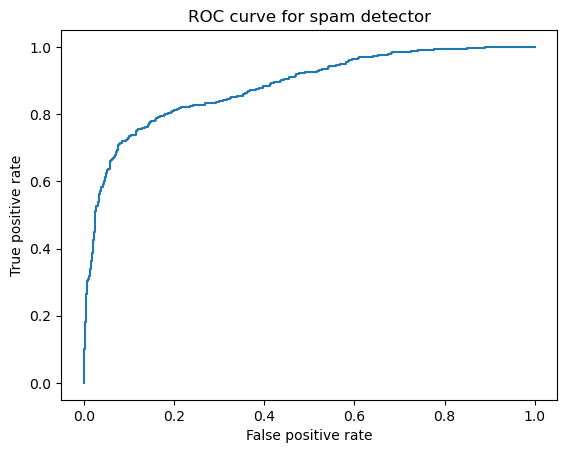

In [49]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer,SimpleImputer
import pandas as pd 
from sklearn.svm import SVC

desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain2.csv'

def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr
    
def predictTest(trainFeatures,trainLabels,testFeatures):

    model = lgb.LGBMClassifier(random_state=42)
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs

trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')


# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]



testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()


10-fold cross-validation mean AUC:  0.8216676855824521
Test set AUC:  0.801125554850983


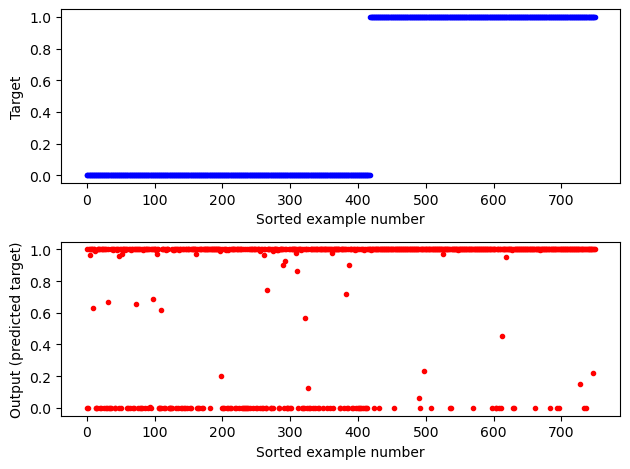

In [50]:
# -*- coding: utf-8 -*-
"""
Demo of 10-fold cross-validation using Gaussian naive Bayes on spam data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def aucCV(features,labels):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    scores = cross_val_score(model,features,labels,cv=10,scoring='roc_auc')
    return scores
def predictTest(trainFeatures,trainLabels,testFeatures):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs

    
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    data = np.loadtxt('spamTrain1.csv',delimiter=',')
    # Separate labels (last column)
    features = data[:,:-1]
    labels = data[:,-1]
    # Evaluating classifier accuracy using 10-fold cross-validation
    print("10-fold cross-validation mean AUC: ",
    np.mean(aucCV(features,labels)))
    # Arbitrarily choose all odd samples as train set and all even as test set
    # then compute test set AUC for model trained only on fixed train set
    trainFeatures = features[0::2,:]
    trainLabels = labels[0::2]
    testFeatures = features[1::2,:]
    testLabels = labels[1::2]
    testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
    print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))
    # Examine outputs compared to labels
    sortIndex = np.argsort(testLabels)
    nTestExamples = testLabels.size
    plt.subplot(2,1,1)
    plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Target')
    plt.subplot(2,1,2)
    plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Output (predicted target)')
    plt.tight_layout()
    plt.show()


Test set AUC: 0.8323834543352772
TPR at FPR = 0.01: 0.12267310789049919


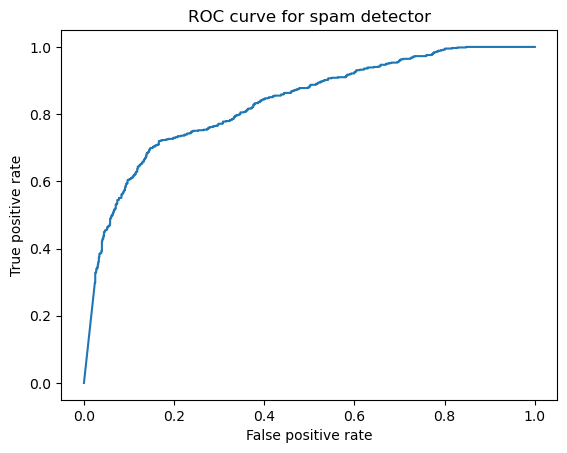

In [51]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
#from classifySpam import predictTest
desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain1.csv'
#testDataFilename = 'spamTest.csv'
def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr
trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')
# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]
testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()